# Fingerprints
 
<!--<badge>--><a href="https://colab.research.google.com/github/kuennethgroup/ml_in_ms_wt24/blob/main/wt_25_ml_in_ms/05_ex/fingerprints.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a><!--</badge>-->

### Fingerprints for text

One-hot encoder to fingerprint words

In [37]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

enc = OneHotEncoder()
sentence = ["A", "horse", ",", "rabbit", ",", "and", "giraffe"]

df = pd.DataFrame(sentence, columns=["word"])

encoding = enc.fit_transform(df).toarray()
df = pd.DataFrame(encoding, index=sentence)
df
# df

0    1    2    3    4    5
A        0.0  1.0  0.0  0.0  0.0  0.0
horse    0.0  0.0  0.0  0.0  1.0  0.0
,        1.0  0.0  0.0  0.0  0.0  0.0
rabbit   0.0  0.0  0.0  0.0  0.0  1.0
,        1.0  0.0  0.0  0.0  0.0  0.0
and      0.0  0.0  1.0  0.0  0.0  0.0
giraffe  0.0  0.0  0.0  1.0  0.0  0.0

# Tutorial

1. Encode the sentence "Mein Oma fährt im Hühnerstall Motorrad"
2. Wirte the sentence by concatinating the fps vectors in a 1D vector

Result:

[0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
 0., 0.]

In [39]:
df.values

array([[0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.]])

Cosine similarity measures the similarity of vectors 

In [41]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

sim = cosine_similarity(df.values)
pd.DataFrame(sim, columns=df.index, index=df.index)

A  horse    ,  rabbit    ,  and  giraffe
A        1.0    0.0  0.0     0.0  0.0  0.0      0.0
horse    0.0    1.0  0.0     0.0  0.0  0.0      0.0
,        0.0    0.0  1.0     0.0  1.0  0.0      0.0
rabbit   0.0    0.0  0.0     1.0  0.0  0.0      0.0
,        0.0    0.0  1.0     0.0  1.0  0.0      0.0
and      0.0    0.0  0.0     0.0  0.0  1.0      0.0
giraffe  0.0    0.0  0.0     0.0  0.0  0.0      1.0

Fingerprint text by counting letters

In [17]:
# Function to count letters in a sentence
def letter_count(s):
    d = {}  # dict to return
    for i in s:  # iterate characters
        d[i] = d.get(i, 0) + 1
    return d


words = ["horse", "rabbit", "giraffe", "horse", "rabbit"]
print("Fingerprints")
counts = [letter_count(xx) for xx in words]
counts

Fingerprints


[{'h': 1, 'o': 1, 'r': 1, 's': 1, 'e': 1},
 {'r': 1, 'a': 1, 'b': 2, 'i': 1, 't': 1},
 {'g': 1, 'i': 1, 'r': 1, 'a': 1, 'f': 2, 'e': 1},
 {'h': 1, 'o': 1, 'r': 1, 's': 1, 'e': 1},
 {'r': 1, 'a': 1, 'b': 2, 'i': 1, 't': 1}]

# Tutorial

1. Encode the sentence "Mein Oma fährt im Hühnerstall Motorrad"
2. Wirte the sentence by concatinating the fps vectors in a 1D vector


### Fingerprints for chemical structures

C(c1ccccc1)(C[*])[*]


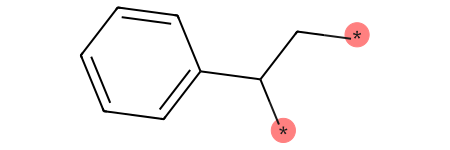

In [17]:
# Install a pip package directly from GitHub is also possible with the following command
#!pip install 'psmiles[polyBERT]@git+https://github.com/Ramprasad-Group/psmiles.git'

from psmiles import PolymerSmiles

# PSMILES string of polystyrene
polystyrene = "C(c1ccccc1)(C[*])[*]"
ps = PolymerSmiles(polystyrene)
ps

In [6]:
# Fingerprint of PS
ps.fingerprint()

array([0, 1, 0, ..., 0, 0, 0])

# Tutorial

- Compute the fingerprint  of all these polymers in a loop

In [19]:
import pandas as pd


psmiles_strings = [
    "*CC*",
    "*CCO*",
    "*CC(C)*",
    "*CC(CC)*",
]

fp_list = []
for smiles in psmiles_strings:
    fp = PolymerSmiles(smiles).fingerprint()
    fp_list.append(fp)

df = pd.DataFrame(psmiles_strings, columns=["PSMILES"])
df["fingeprint"] = fp_list
display(df)
fp_list

PSMILES                                         fingeprint
0      *CC*  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1     *CCO*  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2   *CC(C)*  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3  *CC(CC)*  [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...

[array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 1, 0, ..., 0, 0, 0]),
 array([1, 1, 0, ..., 0, 0, 0])]

Action: 
- Measure similarity using `pairwise_distances` function of sklearn
- Return as pandas dataframe

In [ ]:
# Yeah, sklearn again! We use the pairwise_distance
from sklearn.metrics.pairwise import pairwise_distances
import numpy as np

# Use `euclidean` distance d = sqrt((p1-q1)**2 + (p2-q2)**2 + ...)
# pairwise_distances( ...  metric="euclidean")


psmiles      *CC*     *CCO*   *CC(C)*
psmiles                              
*CC*     0.000000  3.605551  3.000000
*CCO*    3.605551  0.000000  4.472136
*CC(C)*  3.000000  4.472136  0.000000

Action:

- Create a one-hot encoded fingerprints of the PSMILES strings